In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/banana/banana_quality.csv


# Banana Quality Data

This [dataset](https://www.kaggle.com/datasets/l3llff/banana) consists of numerical characteristics of bananas of different quality (Good or Bad). We are going to explore the data and try to create a model that will predict the quality of bananas.

In [2]:
# Load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data


In [3]:
df = pd.read_csv('/kaggle/input/banana/banana_quality.csv')
df.head()

Size    Weight  Sweetness  Softness  HarvestTime  Ripeness   Acidity  \
0 -1.924968  0.468078   3.077832 -1.472177     0.294799  2.435570  0.271290   
1 -2.409751  0.486870   0.346921 -2.495099    -0.892213  2.067549  0.307325   
2 -0.357607  1.483176   1.568452 -2.645145    -0.647267  3.090643  1.427322   
3 -0.868524  1.566201   1.889605 -1.273761    -1.006278  1.873001  0.477862   
4  0.651825  1.319199  -0.022459 -1.209709    -1.430692  1.078345  2.812442   

  Quality  
0    Good  
1    Good  
2    Good  
3    Good  
4    Good

In [4]:
df.shape

(8000, 8)

There are 8 different information of 8,000 bananas.

## Understand the variables

In [5]:
var_df = pd.DataFrame(columns=['Variable', 'Number of Unique Values', 'Values'])

for i, var in enumerate(df.columns):
    var_df.loc[i] = [var, df[var].nunique(), df[var].unique().tolist()]
var_df

Variable  Number of Unique Values  \
0         Size                     8000   
1       Weight                     8000   
2    Sweetness                     8000   
3     Softness                     8000   
4  HarvestTime                     8000   
5     Ripeness                     8000   
6      Acidity                     8000   
7      Quality                        2   

                                              Values  
0  [-1.9249682, -2.4097514, -0.3576066, -0.868523...  
1  [0.46807805, 0.48686993, 1.4831762, 1.5662014,...  
2  [3.0778325, 0.34692144, 1.5684522, 1.8896049, ...  
3  [-1.4721768, -2.4950993, -2.6451454, -1.273761...  
4  [0.2947986, -0.8922133, -0.64726734, -1.006277...  
5  [2.4355695, 2.0675488, 3.0906434, 1.8730015, 1...  
6  [0.27129033, 0.30732512, 1.427322, 0.47786173,...  
7                                        [Good, Bad]

## Data Dictionary

* `Size` (float): Size of banana
* `Weight` (float): Weight of banana
* `Sweetness` (float): Sweetness of banana
* `Softness` (float): Softness of banana
* `HarvestTime` (float): Amount of time passed from harvesting of the fruit
* `Ripeness` (float): Ripeness of banana
* `Acidity` (float): Acidity of banana
* `Quality` (string): Quality of banana

## Interesting Questions
Now we will get to explore this exciting dataset! Let's try our hand at these questions:

* **Which characteristic would be the most important factor that determines the quality of banana?**
* **How are the characteristics related to each other? How do the characteristics of banana change as it ripens over time?**
* **Can we predict the quality of banana with this information?**

## Exploratory Data Analysis (EDA)
The dataset is not huge, we can easily get to know it and decide how to tackle the interesting questions that we defined above. From the introductory code above we know:

* Quality is a binary variable taking 2 values (Good and Bad).
* The other remaining variables are numerical continuous variables.

First of all, let's ensure there are no nulls:

In [6]:
df.isna().sum()

Size           0
Weight         0
Sweetness      0
Softness       0
HarvestTime    0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

Indeed, there is no missing values in the dataset.

In [7]:
df.describe()

Size       Weight    Sweetness     Softness  HarvestTime  \
count  8000.000000  8000.000000  8000.000000  8000.000000  8000.000000   
mean     -0.747802    -0.761019    -0.770224    -0.014441    -0.751288   
std       2.136023     2.015934     1.948455     2.065216     1.996661   
min      -7.998074    -8.283002    -6.434022    -6.959320    -7.570008   
25%      -2.277651    -2.223574    -2.107329    -1.590458    -2.120659   
50%      -0.897514    -0.868659    -1.020673     0.202644    -0.934192   
75%       0.654216     0.775491     0.311048     1.547120     0.507326   
max       7.970800     5.679692     7.539374     8.241555     6.293280   

          Ripeness      Acidity  
count  8000.000000  8000.000000  
mean      0.781098     0.008725  
std       2.114289     2.293467  
min      -7.423155    -8.226977  
25%      -0.574226    -1.629450  
50%       0.964952     0.098735  
75%       2.261650     1.682063  
max       7.249034     7.411633

It seems that there are some non-ordinary values across all numrical continuous variables as we see negative minimum values and they do not seem to make sense given the meaning of the characteristics. However, we cannot exclude the possibility of them being treated/scaled already in some way, i.e., mean-centered, which would have converted some positive values into negative ones. Let's look at their distribution.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

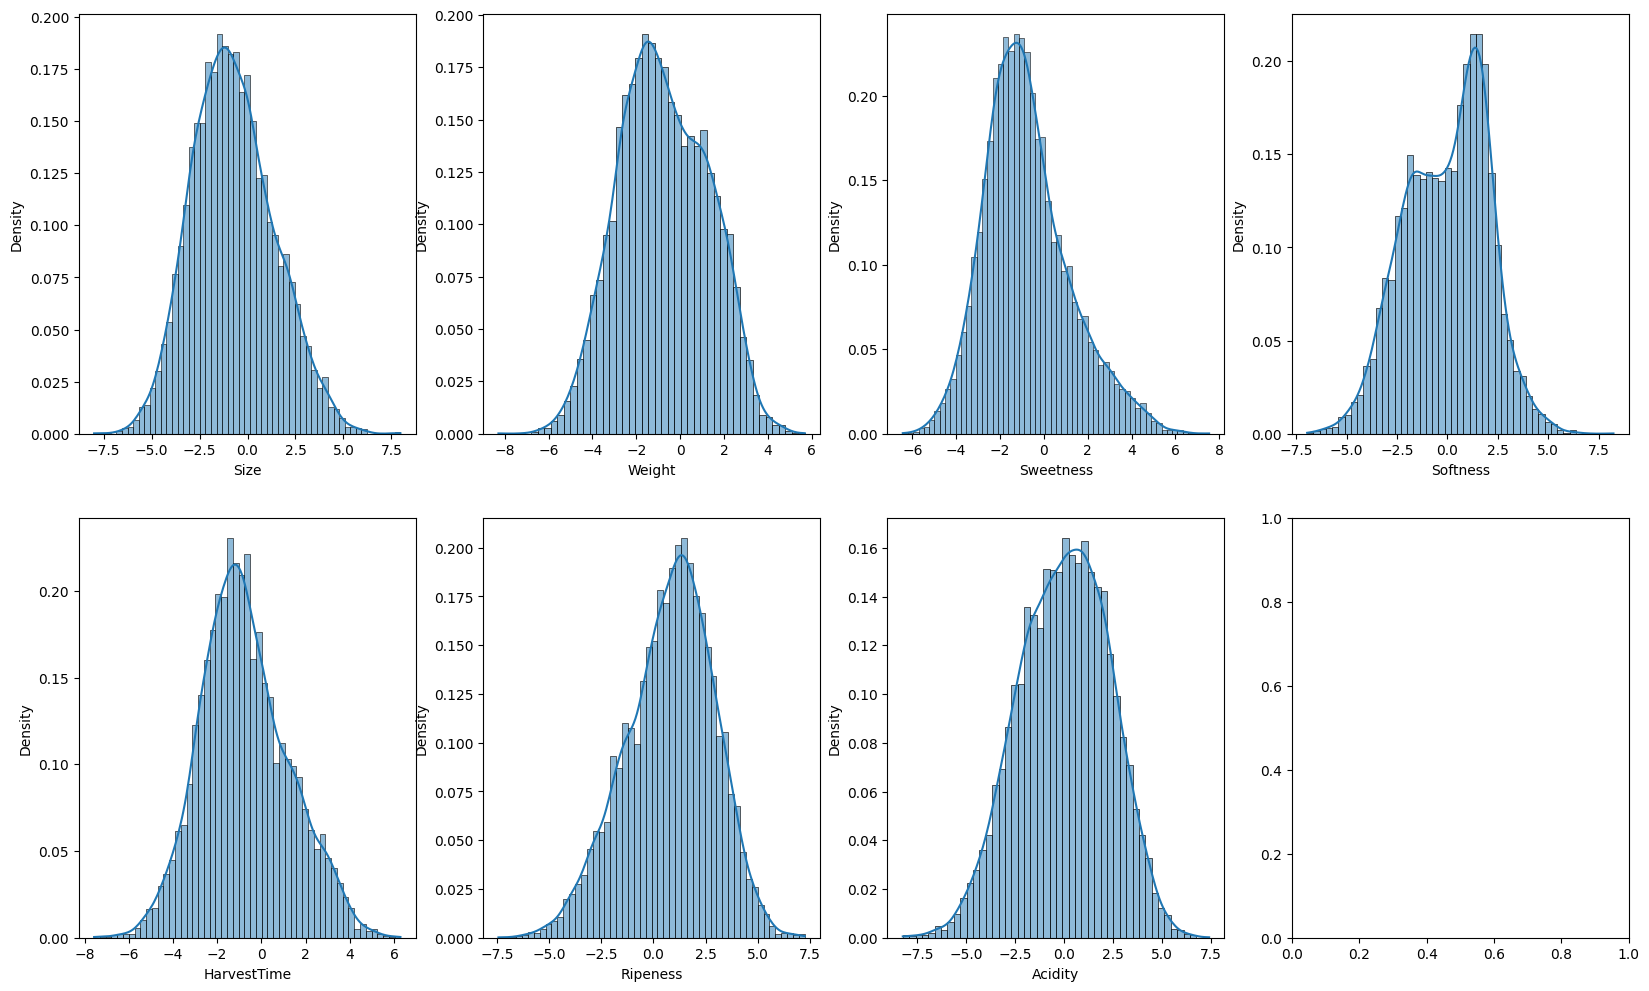

In [8]:
num_cols = df.select_dtypes(include=np.number).columns

n_row, n_col = 2, 4
fig, axs = plt.subplots(n_row, n_col, figsize=[20, 12])

for column, ax in zip(num_cols, axs.ravel()):
    sns.histplot(data=df, x=column, kde=True, stat='density', ax=ax)


It appears that the variables underwent a kind of scaling, as we anticipated. Their distributions suggest that the values fall within a similar range and exhibit symmetrical patterns around zero.

**Which characteristic would be the most important factor that determines the quality of banana?**

To explore the relationship between banana quality and each characteristic, let's observe how the quality values vary for each variable between high-quality and low-quality bananas.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

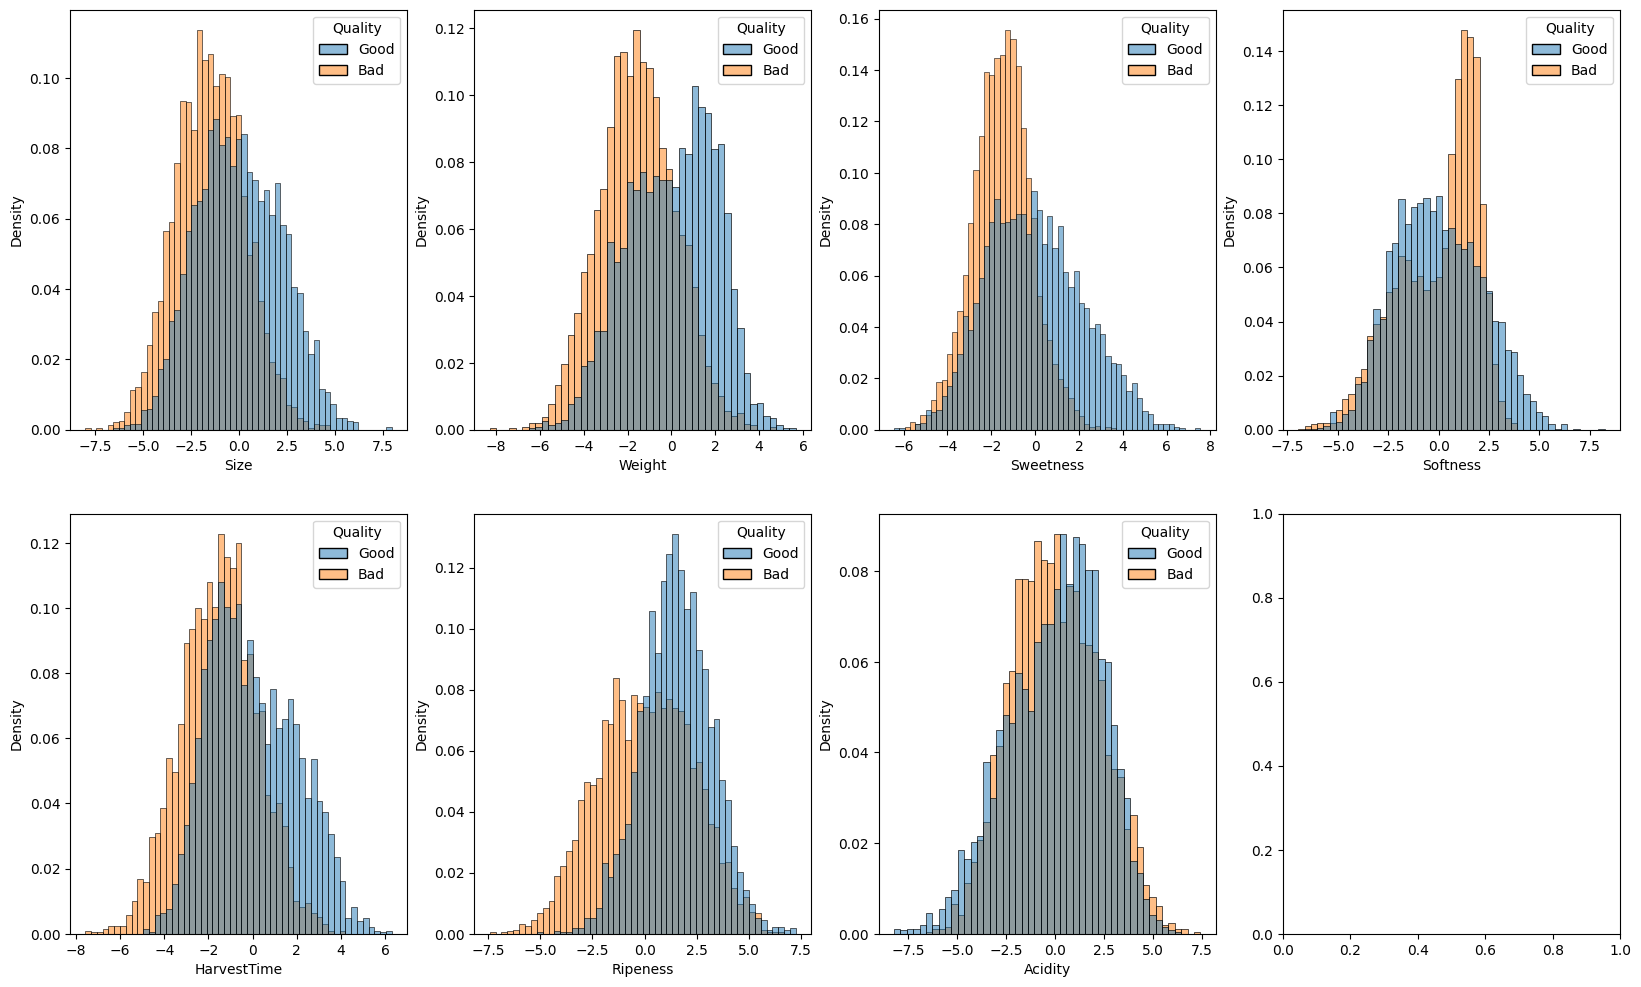

In [9]:
n_row, n_col = 2, 4
fig, axs = plt.subplots(n_row, n_col, figsize=[20, 12])

for column, ax in zip(num_cols, axs.ravel()):
    sns.histplot(data=df, x=column, hue='Quality', stat='density', ax=ax)

plt.show()

Upon comparing the distributions of each characteristic between good and bad quality bananas, distinct disparities emerge, with the exception of the `Acidity` variable, where the distributions exhibit some overlap. Nevertheless, we intend to proceed with $t$-tests to ascertain whether statistically significant differences exist between the distributions of the two types of bananas.

As you may already know, t-tests serve to assess if there exists a significant difference between the means of two groups. The $t$-value is calculated by dividing the difference between the two means by the uncertainty inherent in this difference, known as the standard error. This adjustment is necessary due to the inherent variability in sampled data, which inevitably introduces error into the determination of means.

In [10]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()

for col in num_cols:
    good_qual_bananas = df.loc[df['Quality']=='Good', col]
    bad_qual_bananas = df.loc[df['Quality']=='Bad', col]
    print("The results of the t-test for " + col + ': ')
    result = stats.ttest_ind(good_qual_bananas, bad_qual_bananas)
    print(result)
    if result[1] < 0.05:
        print('Reject the null hypothesis; there is a significant difference between the sample means.')
    else:
        print('Fail to reject the null hypothesis; there is no significant difference between the sample means.')
    print('\n')

The results of the t-test for Size: 
TtestResult(statistic=33.73962998335712, pvalue=1.960547470682263e-233, df=7998.0)
Reject the null hypothesis; there is a significant difference between the sample means.


The results of the t-test for Weight: 
TtestResult(statistic=37.739037902011866, pvalue=5.513984954490505e-287, df=7998.0)
Reject the null hypothesis; there is a significant difference between the sample means.


The results of the t-test for Sweetness: 
TtestResult(statistic=36.42641264816277, pvalue=6.195977428863384e-269, df=7998.0)
Reject the null hypothesis; there is a significant difference between the sample means.


The results of the t-test for Softness: 
TtestResult(statistic=-0.14644228329667378, pvalue=0.8835759406046255, df=7998.0)
Fail to reject the null hypothesis; there is no significant difference between the sample means.


The results of the t-test for HarvestTime: 
TtestResult(statistic=36.35666232582134, pvalue=5.477675103055471e-268, df=7998.0)
Reject the nu

At a significance level of 5 percent, our analysis suggests that, apart from softness and acidity, the mean values of the other variables are significantly different between the two quality types of bananas. To put it differently, those variables may play significant roles in determining the quality of bananas.

**How are the characteristics related to each other? How do the characteristics of banana change as it ripens over time?**

To examine the relationships between variables, we plot pairwise relationships between each pair of variables.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

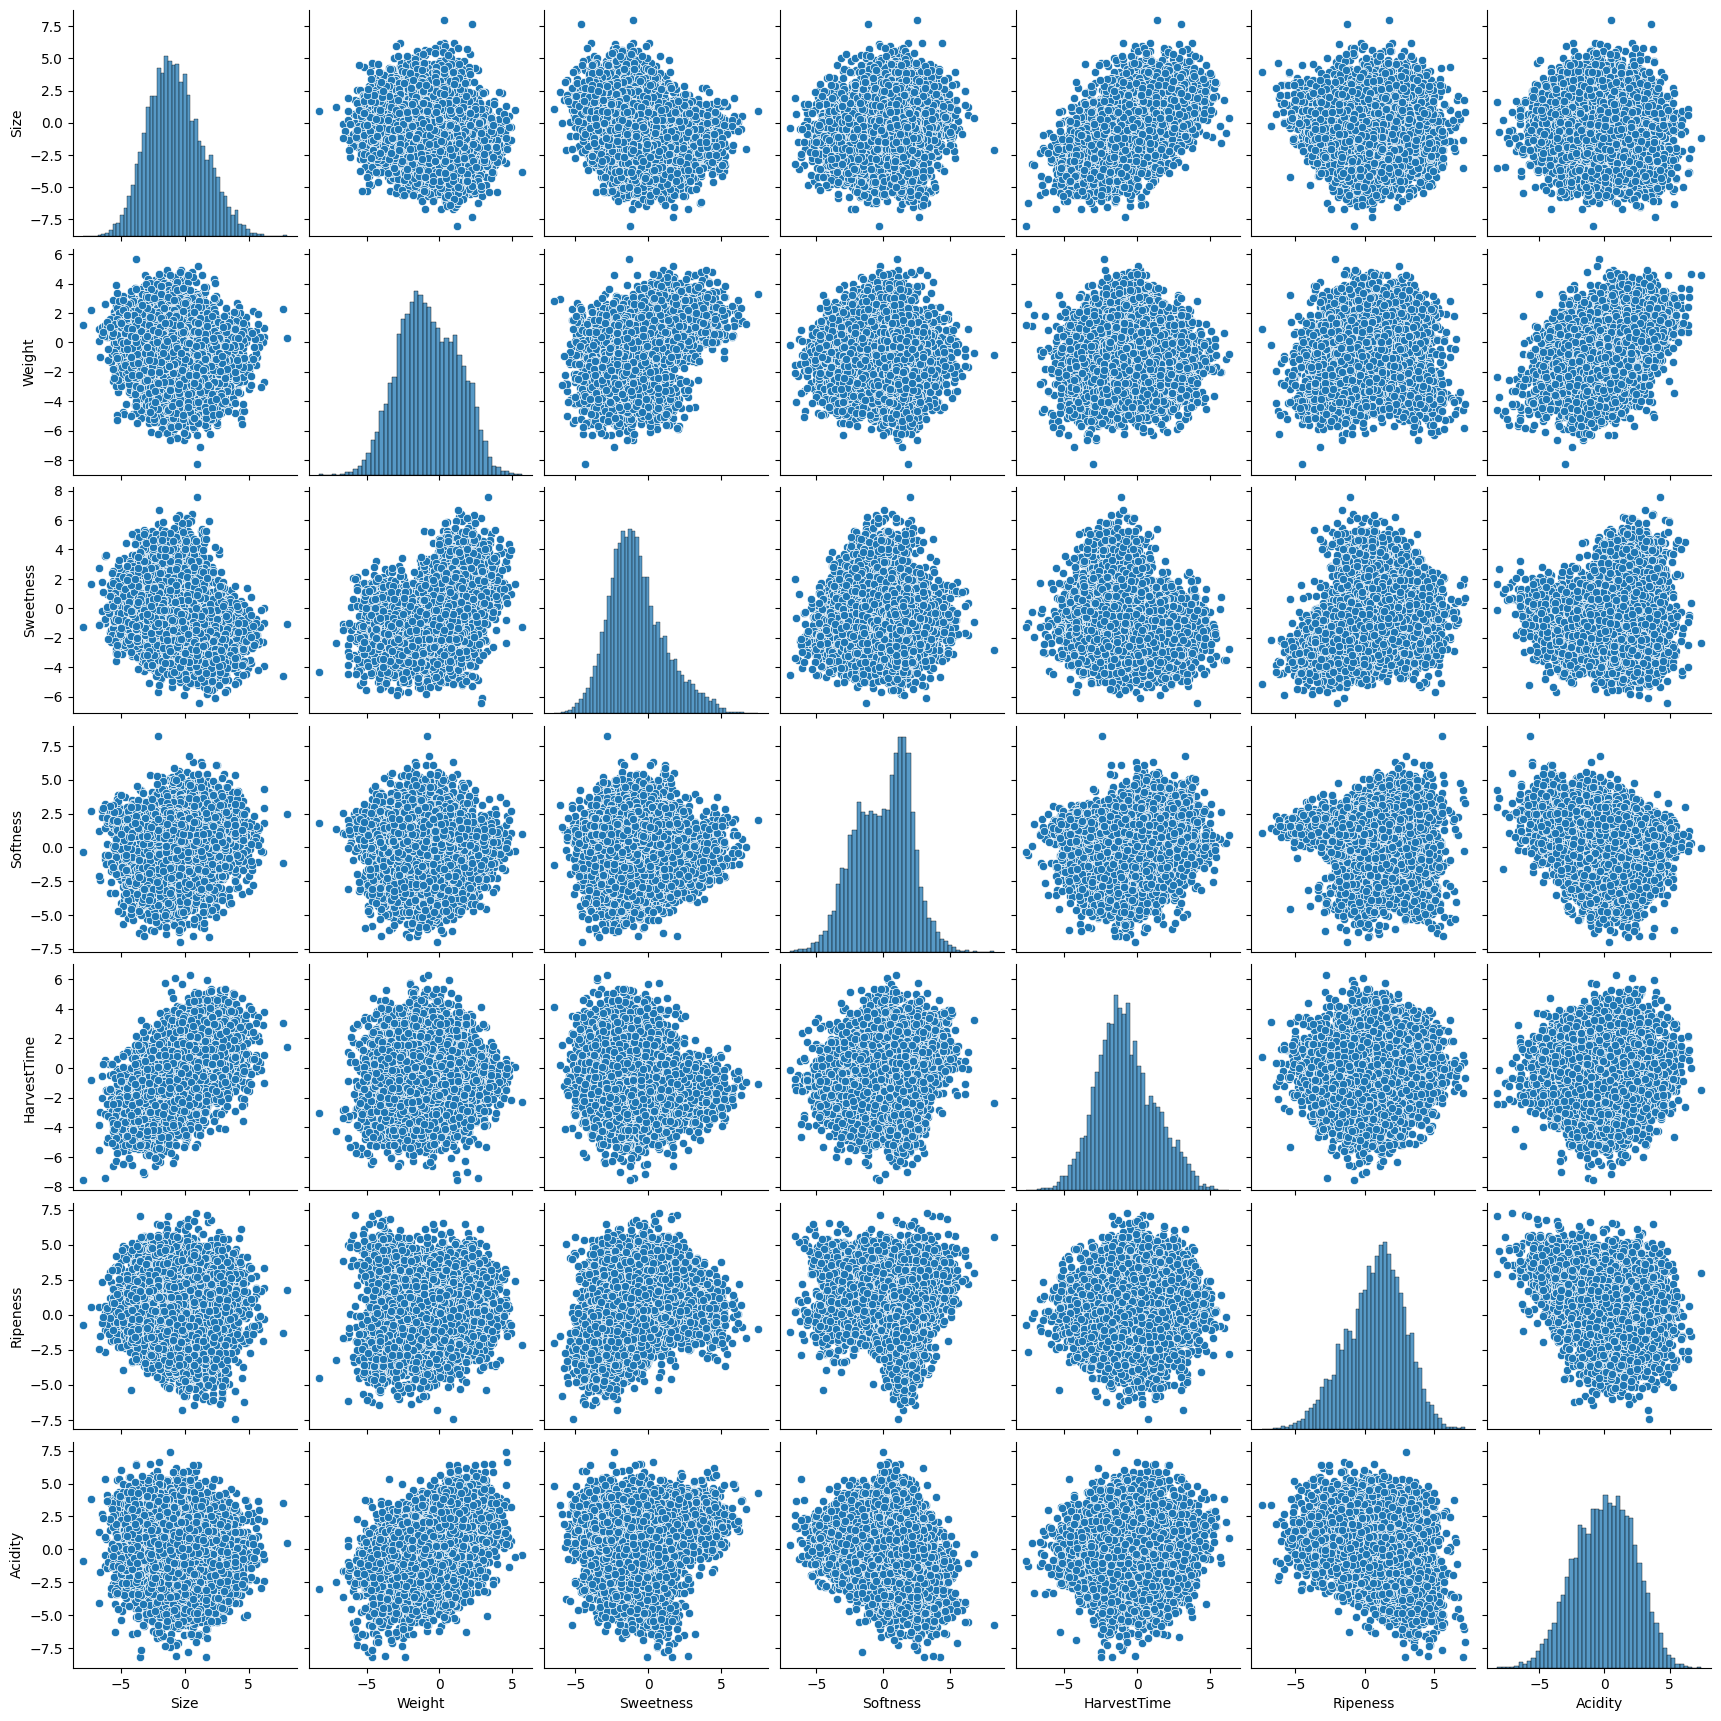

In [11]:
sns.pairplot(df)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

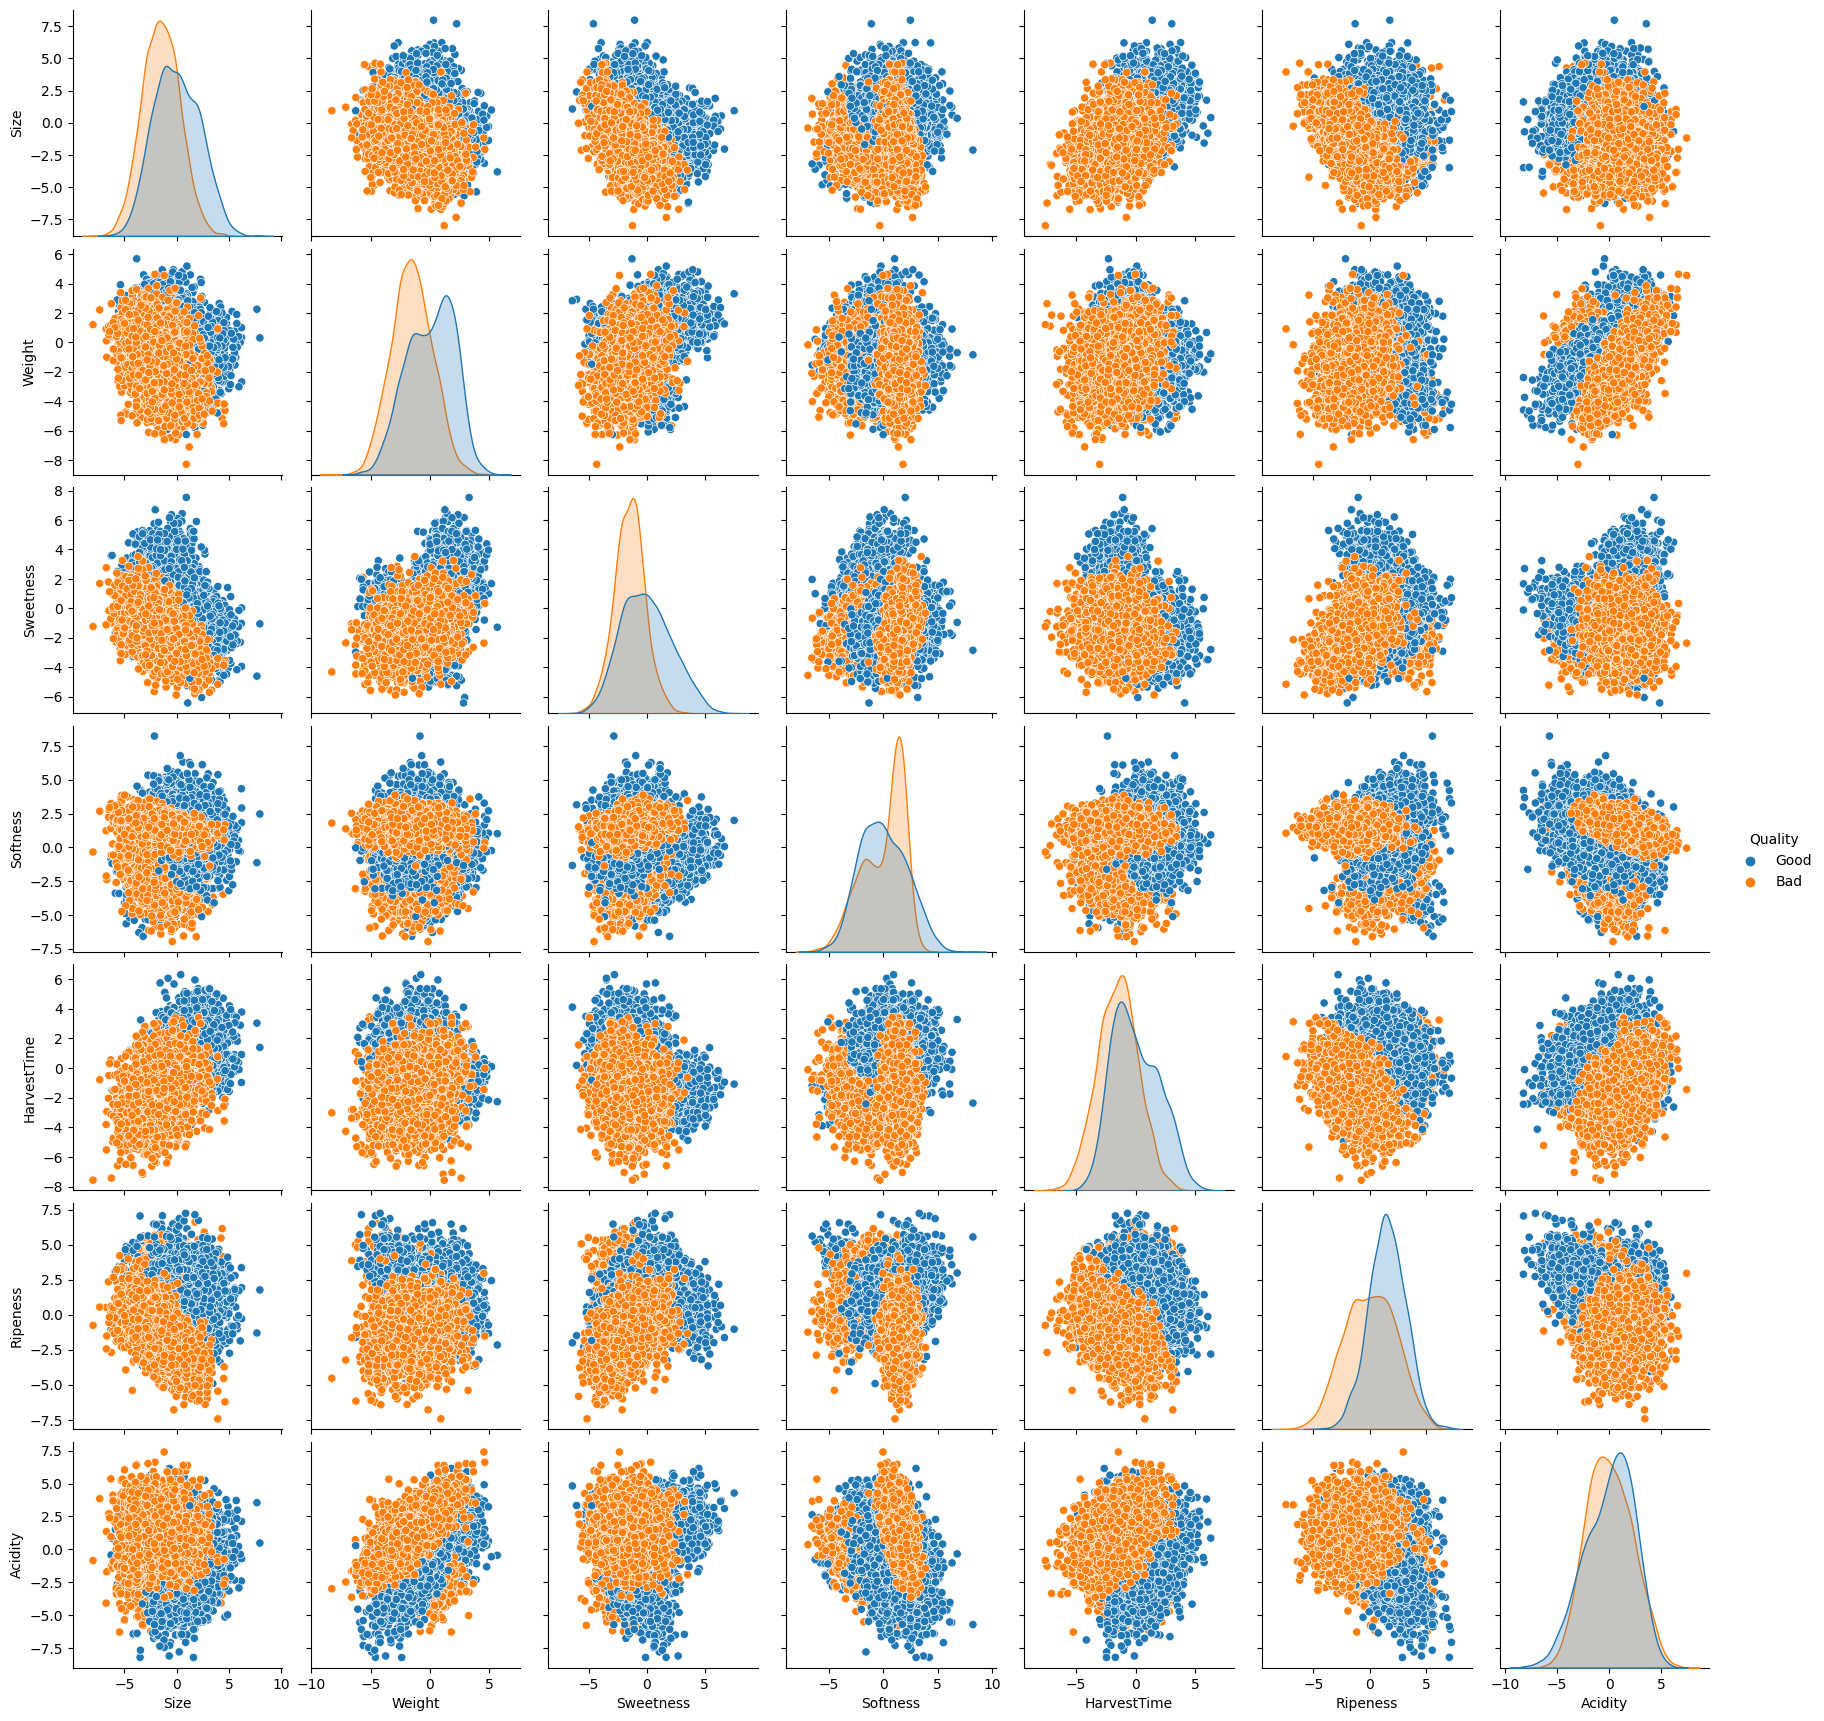

In [12]:
sns.pairplot(df, hue='Quality')

Based on the depicted plots, it appears that there are no discernible relationships among the variables. This could be attributed to the fact that the variables have already been scaled, potentially causing any relationships to become indiscernible.

## Modeling

Now that we have examined the relationships among the variables, we will address our final question: **Can we predict the quality of bananas using this information?** To do this, we will construct a simple logistic model to predict banana quality, as the dependent variable is binary.

### Split the data into training and test datasets

First, we will split the data into training and test datasets. The training set will comprise 70% of the total data, while the remaining 30% will be assigned to the test set.

In [13]:
# Define dependent and independent variables
y = df['Quality'].replace({'Good': 1, 'Bad': 0})
X = df.drop(['Quality'], axis=1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

/tmp/ipykernel_94/212175557.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = df['Quality'].replace({'Good': 1, 'Bad': 0})


### Fit a logistic regression model on the training data

In [14]:
# Fit a logistic regression model on the training data
model = LogisticRegression().fit(X_train, y_train)

As we've trained our logistic regression model on the training data, let's see how the model looks like.

In [15]:
coefs = pd.DataFrame(model.coef_)
coefs.columns = model.feature_names_in_
coefs['Intercept'] = model.intercept_
coefs

Size    Weight  Sweetness  Softness  HarvestTime  Ripeness   Acidity  \
0  0.689277  1.011169   0.773299  0.083834     0.556131  0.592052 -0.104325   

   Intercept  
0    1.72386

The training logistic regression is defined as:
$P(y=Good)=1 \over 1+e^{-(1.72+0.69 \times Size+1.01 \times Weight+0.77 \times Sweetness+0.08 \times Softness+0.56 \times HarvestTime+0.59 \times Ripeness-0.10 \times Acidity)}$

In order to interpret the coefficients, we should know first that for a feature $x_i$ with coefficient $\beta_i$, a one-unit increase in $x_i$ changes the log-odds by $\beta_i$. In other words, the corresponding change in odds is multiplicative by a factor of $e^{\beta_i}$. Then, for example, if the size of a banana increases by one unit, the odds of it being good quality increase by 1.99.

### Predict the quality of bananas in the test data
Now, we'll use this model to predict the quality of bananas in the test data and evaluate the accuracy of these predictions.

In [16]:
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 87.72727272727273
